## 신경망을 사용한 이진분류

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [6]:
X,y=make_blobs(n_samples=500,n_features=2,centers=2,random_state=1)#샘플의 수, 변수의 수

In [7]:
X.shape, y.shape

((500, 2), (500,))

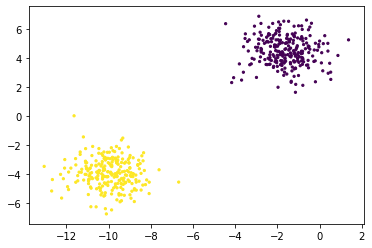

In [10]:
plt.scatter(X[:,0],X[:,1],c=y,s=5)
plt.show()

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=1)

In [13]:
X_train.shape

(400, 2)

In [14]:
model=Sequential()

In [19]:
model.add(Dense(32,input_shape=(2,),activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

In [23]:
hist=model.fit(X_train,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
10/10 [==============================] - 1s 58ms/step - loss: 1.9612e-11 - val_loss: 4.2357e-12
Epoch 2/200
10/10 [==============================] - 0s 8ms/step - loss: 2.0095e-11 - val_loss: 4.2308e-12
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: 2.0156e-11 - val_loss: 4.2287e-12
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: 2.0968e-11 - val_loss: 4.2294e-12
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: 2.1570e-11 - val_loss: 4.2329e-12
Epoch 6/200
10/10 [==============================] - 0s 9ms/step - loss: 2.1684e-11 - val_loss: 4.2392e-12
Epoch 7/200
10/10 [==============================] - 0s 8ms/step - loss: 2.2188e-11 - val_loss: 4.2486e-12
Epoch 8/200
10/10 [==============================] - 0s 8ms/step - loss: 2.3236e-11 - val_loss: 4.2610e-12
Epoch 9/200
10/10 [==============================] - 0s 8ms/step - loss: 2.3940e-11 - val_loss: 4.2765e-12
Epoch 10/200
10/10 [================

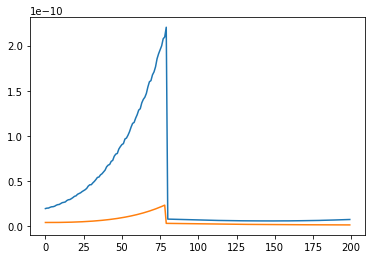

In [26]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')

In [28]:
y_pred=model.predict(X)

16/16 [==============================] - 0s 2ms/step


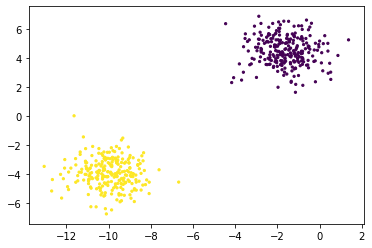

In [30]:
plt.scatter(X[:,0],X[:,1],s=5,c=y)

In [32]:
model.predict([[-6,0]])

1/1 [==============================] - 0s 263ms/step


array([[0.99992085]], dtype=float32)

In [33]:
model.save('tp_bin_class')

INFO:tensorflow:Assets written to: tp_bin_class\assets


In [37]:
load=tf.keras.models.load_model('tp_bin_class')

In [38]:
load.predict([[-6,0]])

1/1 [==============================] - 0s 214ms/step


array([[0.99992085]], dtype=float32)